In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [2]:
twitter_df = pd.read_csv('twitter.csv')

In [3]:
twitter_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
twitter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
twitter_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
twitter_df.drop(['id'],axis=1,inplace=True)
twitter_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
##Explore Dataset

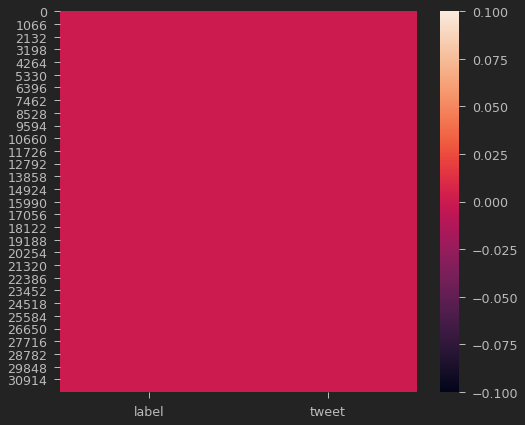

In [8]:
sns.heatmap(twitter_df.isnull()) ##see if there is any null value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69af05bd60>]],
      dtype=object)

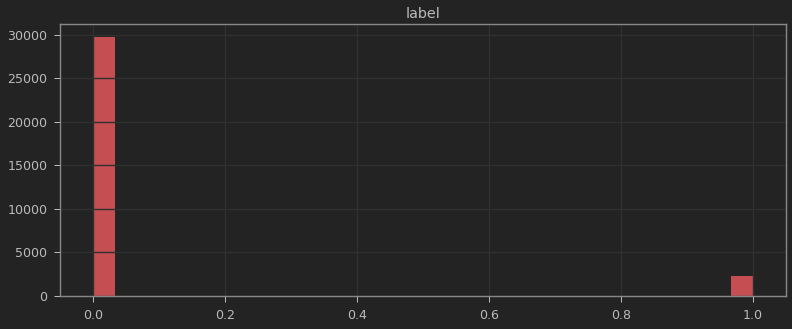

In [9]:
twitter_df.hist(bins=30,color = 'r',figsize=(13,5)) ##check dist of tweets

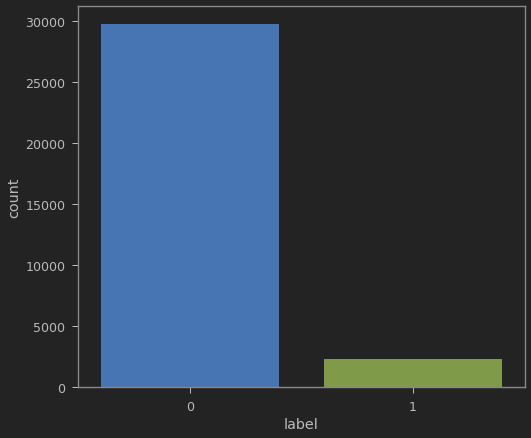

In [10]:
sns.countplot(data=twitter_df,x='label') ##same as above using sns

In [11]:
twitter_df['length']=twitter_df['tweet'].apply(len) ##creating a new column length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69aebcbb20>]],
      dtype=object)

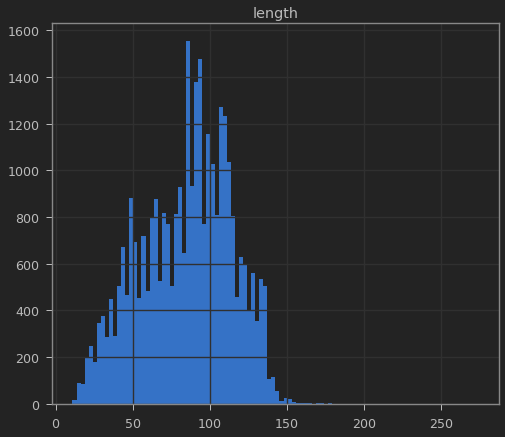

In [12]:
twitter_df.hist(column='length',bins=100) ##checking dist of length of tweets

In [13]:
twitter_df['length'].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [14]:
twitter_df[twitter_df['length']==11]['tweet'].iloc[0]

'i love you '

In [15]:
twitter_df[twitter_df['length']==85]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [16]:
#segregating the positive and negative tweets

In [17]:
positive = twitter_df[twitter_df['label']==0]
positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29720 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   29720 non-null  int64 
 1   tweet   29720 non-null  object
 2   length  29720 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 928.8+ KB


In [18]:
negative = twitter_df[twitter_df['label']==1]
negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 13 to 31960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2242 non-null   int64 
 1   tweet   2242 non-null   object
 2   length  2242 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 70.1+ KB


In [19]:
sentences = twitter_df['tweet'].tolist()
sentences_vector= " ".join(sentences)

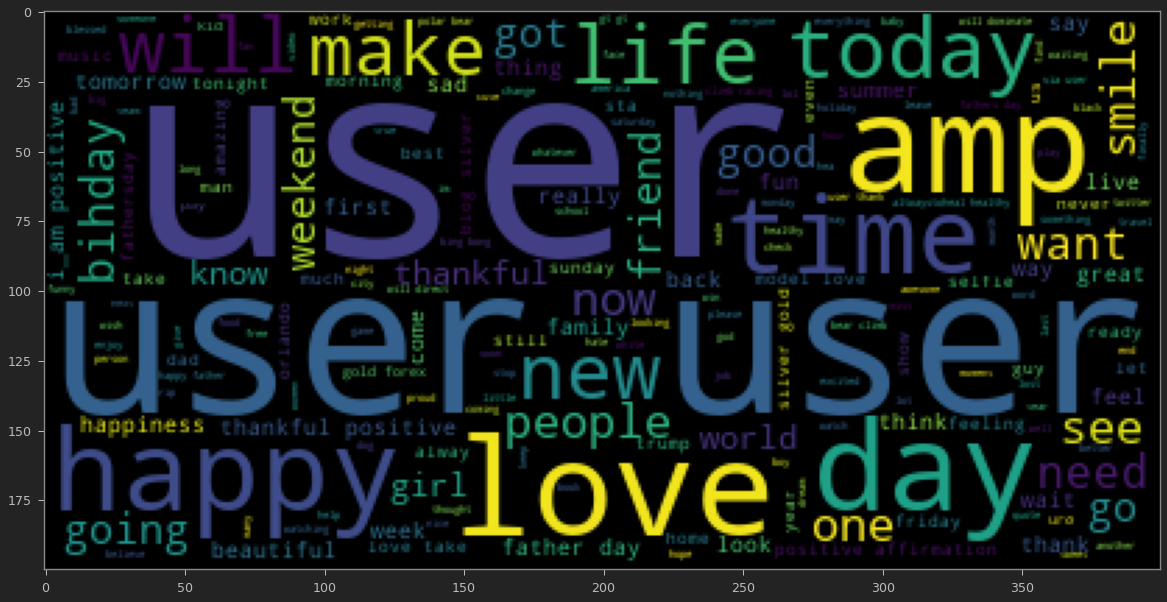

In [20]:
from wordcloud import WordCloud ##wordcloud !pip install wordcloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_vector))

In [21]:
n_sentences = negative['tweet'].tolist()
n_sentences = " ".join(n_sentences)

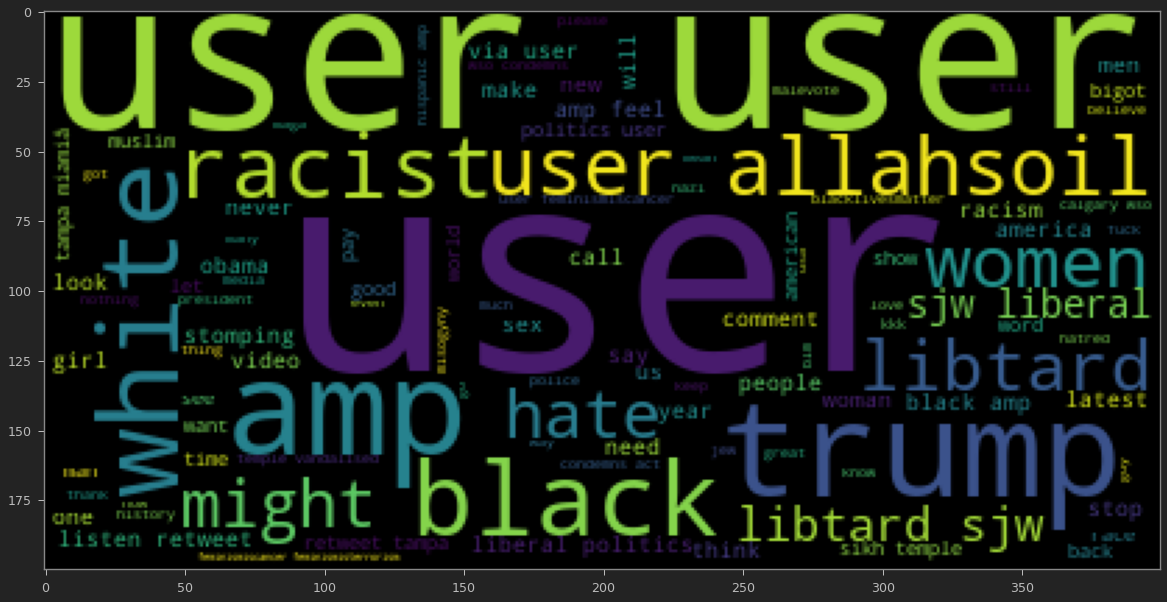

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(n_sentences))

In [23]:
## Data Cleaning
import string
string.punctuation ## remove punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
import nltk
nltk.download('stopwords') # remove stopwards

[nltk_data] Downloading package stopwords to /home/sage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
from sklearn.feature_extraction.text import CountVectorizer ##Tokenization

In [27]:
def message_cleaning(message):
    test_punc_removed =  [char for char in message if char not in  string.punctuation]
    test_joined = ''.join(test_punc_removed)
    test_clean = [word for word in test_joined.split() if word.lower() not in stopwords.words('english')]
    return test_clean

In [28]:
tweet_clean = twitter_df['tweet'].apply(message_cleaning)

In [29]:
tweet_clean[5]

['22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo']

In [30]:
twitter_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [31]:
vectorizer = CountVectorizer(analyzer=message_cleaning) ## tokenization of data, addinganalyzer which acts as mask for methods
tweets_countervectrizer = vectorizer.fit_transform(twitter_df['tweet'])

In [32]:
tweets_countervectrizer.shape

(31962, 47386)

In [33]:
X = tweets_countervectrizer
y = twitter_df['label']

In [34]:
y.shape

(31962,)

In [35]:
## slpiting the dataset Train/Test
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [36]:
from sklearn.naive_bayes import MultinomialNB ##using Naive_Bayes Classifiers
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [37]:
from sklearn.metrics import classification_report,confusion_matrix ## using confusion matrix to visualize prediction
y_predict_test = NB_classifier.predict(X_test)

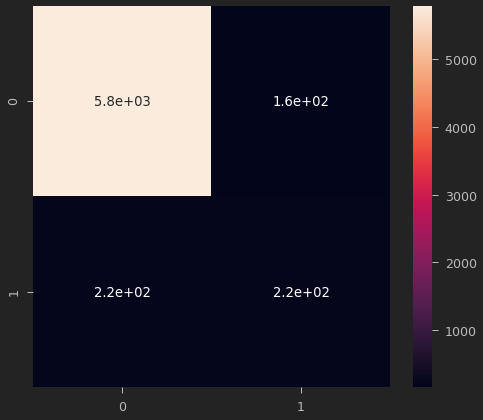

In [38]:
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [40]:
print(classification_report(y_test,y_predict_test)) ##report

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5947
           1       0.58      0.50      0.54       446

    accuracy                           0.94      6393
   macro avg       0.77      0.74      0.75      6393
weighted avg       0.94      0.94      0.94      6393

